In [1]:
import numpy as np 
import pandas as pd
from urllib import request

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns 

from dateutil.parser import parse
from datetime import date
import calendar
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

import scipy.stats as st
from scipy.stats import norm

# No-food-waste project

### Abstract
Current report contains work with the dataset provided by "CODE" university partner "Metronom". "Metronom" is a part of the huge german retailer company "Metro". The data contains information from the one german store. Time interval of the data set - is a period berween 1st to 31th of January 2020. There is no record on Saturdays and on Sundays.

By exploring the target variables, it was found that sales drops on Fridays, on contrary shrinkage takes the biggest part on Fridays. Fresh products take the main part in target variables compare to ultrafresh products. The top 10 best-selling products in the department store make almost 11% of total sells. The top 3 products with the highest shrinkage take around 7% out of the total shrinkage and make only 0,58% of total sales which could consider as the reason to give up on selling these products. Also it was explored that there is no correlation between target numeric variables. In addition, we found that the most suitable theoretical distribution of the sales is positively skewed lognorm distribution and 75% of the sales values lay in interval between 1 and 54. Results were acheived by explanatory data analysis, visualizations with Python libraries and statistical methods. 

### Introduction


How we can find the main patterns between sales and shrinkage? We hypothesised that we could explore relationships between categorical and numerical variables.
   
The main questions we have answered through out the report: is there relationship between shrinkage and sales? What are the products with the highest shrinkage? 
In order to achive a goal we worked with different categories of data (such as date, weekday, purchasing area of product) and used explanatory data analysis and statistical methods. Since the data was row - cleaning, consulting with the company data experts and finding a way to work with the missing values took is a big part of the report. The structure of the report as folowing: loading and pre-processing the data, cleaning, exploring the data. By following step by step analyse process, we explored trends of sales and shrinkage by day and by weekday and sales drops on Fridays, on contrary shrinkage takes the biggest part on Fridays (around 42% out of total). Fresh and ultrafresh products take 56% and 44% of total sales and 73,6% and 26,4% of total shrinkage respectively. We found the top 10 sold products. The top 3 products with the highest shrinkage take around 7% out of the total shrinkage and make only 0,58% of total sales which could consider as the reason to give up on selling these products. Exploration of correlation metrics proved that there is no correlation between our target variables. In addition, we found that the most suitable theoretical distribution of the sales is positively skewed lognorm distribution and 75% of the sales values lay in interval between 1 and 54.
Shrinkage is a very complex variable which depends on human factor. There is not enough information in the current data to tackle the problem of decreasing shrinkage since so it could be as a target for the next step.

### Data, materials and Methods

**Data**

The data set was provided by one of the biggest german retail company __["METRO"](https://www.metro.de/)__ . The dataset contains information about products for the one german department store. Data could not be shared openly due to non-disclosure agreement

*Time interval of the data set* -  period berween 1st to 31th of January 2020. 

*German* is a main language of the data set. Names of the columns were translated for more convinient work. 

Translation of categories as following: *ACM FLEISCH* - meat category, *ACM BACKWAREN* - bakery products category, *ACM FRISCHFISCH* - fresh fish category, *ACM MOLKEREIPRODUKTE* - dairy products category, *ACM KAESE* - cheese products category, *ACM FEINKOST* - delicatessen category, *ACM GOURVENIENCE* - the own brand of "Metro" category, *ACM WURST* - sausage category, *ACM OBST* - fruits category, *ACM GEMUESE* - vegetables category.

Each purchasing area is a part of 2 big categories devided by freshness. We have got an information from "Metro" with following description:  ACM FLEISCH, ACM FRISCHFISCH, ACM GEMUESE, ACM BLUMEN, ACM OBST belong to "ultrafresh" category (5 purchasing areas) and rest of them are normal fresh. 

**Keywords**:

*Depo* is a B2B shop for the small businesses (HORECA): shops, cafes, restaurants.

*Shrinkage* is a waste of products due to different reasons such as theft, damage, spoilage.

*Freshness* is an attribute of the perceived quality of food.

**Reqired libraries:**
- __[Numpy](https://www.numpy.org/)__ ,
- __[Pandas](https://pandas.pydata.org/)__ ,
- __[Seaborn](https://seaborn.pydata.org/)__ ,
- __[Matplotlib](https://matplotlib.org/)__  ,
- __[SciPy](https://www.scipy.org/)__ ,
- __[SciPy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)__ .


### Discussion

### i. Loading and pre-processing the data

In [2]:
filepath = "./data_metro.csv"
df = pd.read_csv(filepath, encoding = "ISO-8859-1", error_bad_lines=False,low_memory=False, sep="\t")

Current dataset contains 13 columns, most of them are stored as a string format. A few target columns have missing values.
We need to start cleaning the data.

In [3]:
df.columns

Index(['store_id', 'store_desc', 'CATMAN_BUY_DOMAIN_ID',
       'CATMAN_BUY_DOMAIN_DESC', 'PCG_MAIN_CAT_ID', 'PCG_CAT_ID',
       'PCG_CAT_DESC', 'PCG_SUB_CAT_ID', 'PCG_SUB_CAT_DESC', 'ART_NO',
       'ART_NAME', 'Bv NNEK', 'Bv Stk', 'Bestand Ist NNEK',
       'Bestand Ist Stück', 'WA Stück', 'Umsatz VK Netto', 'date_of_day',
       'DAY_DESC'],
      dtype='object')

Since we have got a row data, column names are not self-explanatory and difficult to work with. Column names have to be renamed into more accurately described ones.

In [4]:
df = df.rename(columns={"CATMAN_BUY_DOMAIN_ID": "purchasing_area_id", 
                   "CATMAN_BUY_DOMAIN_DESC" : "purchasing_area_description", 
                   "PCG_MAIN_CAT_ID" : "main_product_group_id",
                   "PCG_CAT_ID" : "product_group_category_id",
                   "PCG_CAT_DESC" : "product_group_category_description",
                   "PCG_SUB_CAT_ID" : "product_subgroup_category_id",
                   "PCG_SUB_CAT_DESC" : "product_subgroup_category_description",
                            "ART_NO": "article_number",
                            "ART_NAME":"article_name",
                   "Bv NNEK" : "daily_shrinkage_in_euros",
                   "Bv Stk" : "daily_shrinkage_in_pieces",
                   "Bestand Ist NNEK": "daily_stock_in_euros",
                   "Bestand Ist Stück": "daily_stock_in_pieces",
                   "WA Stück": "daily_sales_in_pieces",
                   "Umsatz VK Netto" : "daily_sales_in_euros"
                   
                  })
df.sample(2)

,store_id,store_desc,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,article_number,article_name,daily_shrinkage_in_euros,daily_shrinkage_in_pieces,daily_stock_in_euros,daily_stock_in_pieces,daily_sales_in_pieces,daily_sales_in_euros,date_of_day,DAY_DESC
649225,579,LIEFERDEPOT BERLIN,66,ACM BLUMEN,991,1,Topfpflanzen,31,Philodendron,180994,CALATHEA CROCATA 13CM TOPF,NaN,NaN,0.0,0.0,NaN,NaN,21.01.20,21.01.20 Die
234600,579,LIEFERDEPOT BERLIN,53,ACM FEINKOST,945,55,Antipasti,20,Spezialitaeten Antipasti,106924,"750g GETROCKNETE TOMATEN,GEF.",NaN,NaN,0.0,0.0,NaN,NaN,21.01.20,21.01.20 Die


The data dictionary provided with the dataset is as the following:

**store_id and store_desc** - number and name of the department store, we have got a data from one store; 

**purchasing_area_id** and **purchasing_area_description** - id and name of the main categories of products (11);

**product_group_category_id** and **product_group_category_description** - id and name of detailed categories of products (179);

**product_subgroup_category_id** and **product_subgroup_category_description** - id and name of  subcategories of products (773);

**article_number** and **article_name**- number (23845) and name (23003) of each product;

**daily_shrinkage_in_euros** and **daily_shrinkage_in_pieces** - shrinkage of each product in euros and in pieces;

**daily_stock_in_euros** and **daily_stock_in_pieces** - daily stock of each product in euros and in pieces;

**daily_sales_in_euros** and **daily_sales_in_pieces** - daily sales of each product in euros and in pieces;

**date_of_day** - date (YYYY-MM-DD)

**DAY_DESC** - date in a different format (DD.MM.YY Weekday)

We are going to explore different categories of products to get familiar with them.

In [5]:
len(df["purchasing_area_description"].unique().tolist())

11

There are 11 purchasing areas of products.

In [6]:
len(df["product_group_category_description"].unique())

179

There are 179 product categories.

In [7]:
len(df["product_subgroup_category_description"].unique().tolist())

773

There are 773 product subcategories. 

Is there the same amount of article numbers as article names?
First, there are 738671 rows in total. Now let's check how many unique article numbers and related products in the data set.

In [8]:
array_of_art_num = df["article_number"].unique().tolist()
len(array_of_art_num)

23845

Now we check number of names of the product.

In [9]:
array_of_art_name = df["article_name"].unique().tolist()
len(array_of_art_name)

23003

We got less product names then article numbers. This question was clarified with the company data analyst. It is happening because sometimes the same products has the different article numbers (different taste, flavour and so on). For current report we will use article name.

## ii. Cleaning the data

First, we explore types of data to find obvious issues.

In [10]:
df.dtypes

store_id                                   int64
store_desc                                object
purchasing_area_id                         int64
purchasing_area_description               object
main_product_group_id                      int64
product_group_category_id                  int64
product_group_category_description        object
product_subgroup_category_id               int64
product_subgroup_category_description     object
article_number                             int64
article_name                              object
daily_shrinkage_in_euros                  object
daily_shrinkage_in_pieces                float64
daily_stock_in_euros                     float64
daily_stock_in_pieces                    float64
daily_sales_in_pieces                    float64
daily_sales_in_euros                     float64
date_of_day                               object
DAY_DESC                                  object
dtype: object

By exploring types of the dataframe, we determined a few issues which has to be managed in order to continue working with data:
* daily_shrinkage_in_euros has an object type;
* categorical columns have an object type;
* date_of_day has an object type.

In [11]:
df["daily_shrinkage_in_euros"].replace(',','.',inplace = True, regex = True)
df[["daily_shrinkage_in_euros"]] = df[["daily_shrinkage_in_euros"]].apply(pd.to_numeric)
df["daily_shrinkage_in_euros"].dtype

dtype('float64')

Now we change the data type of all categorical columns such as "purchasing_area_description", "product_group_category_description', "product_subgroup_category_description','article_name' from object to category.

In [12]:
for col in ["purchasing_area_description", "product_group_category_description", "product_subgroup_category_description", "article_name"]:
    df[col] = df[col].astype("category")

Date represented by two columns "date_of_day" and "DAY_DESC". We decided to use date_of_day column, and besides changing the type, to extract additional information about weekday ans save it to the new column.

In [13]:
df["date_of_day"]=pd.to_datetime(df["date_of_day"], format="%d.%m.%y")

Now, when the column "date_of_day" has datetime type, we can extract an information about weekdays. This is going to be important column for the explorational part of the report later.

In [14]:
df['weekday'] = df["date_of_day"].dt.dayofweek.apply( lambda x: calendar.day_name[x])
df['weekday'] = df['weekday'].astype('category')
df.dtypes

store_id                                          int64
store_desc                                       object
purchasing_area_id                                int64
purchasing_area_description                    category
main_product_group_id                             int64
product_group_category_id                         int64
product_group_category_description             category
product_subgroup_category_id                      int64
product_subgroup_category_description          category
article_number                                    int64
article_name                                   category
daily_shrinkage_in_euros                        float64
daily_shrinkage_in_pieces                       float64
daily_stock_in_euros                            float64
daily_stock_in_pieces                           float64
daily_sales_in_pieces                           float64
daily_sales_in_euros                            float64
date_of_day                              datetim

As a result of this part, we fixed types of data, but we have some data which is not going to be usefull for our report.

#### Exploring the null values and redundant data.

There are columns with a redundant data which is not useful for our project. We can easily drop following colomns: 
- "store_id" and "store_desc", since we have data for only one store;
- "DAY_DESC", since we have enough information about date;
- purchasing_area_id, "main_product_group_id", "product_group_category_id", "product_subgroup_category_id", "article_number" columns do not have usefull information for the current report.

In [15]:
df = df.drop(["store_id","store_desc","DAY_DESC", "article_number", "purchasing_area_id","main_product_group_id", "product_group_category_id","product_subgroup_category_id"], axis = 1)

In [16]:
df.sample(2)

,purchasing_area_description,product_group_category_description,product_subgroup_category_description,article_name,daily_shrinkage_in_euros,daily_shrinkage_in_pieces,daily_stock_in_euros,daily_stock_in_pieces,daily_sales_in_pieces,daily_sales_in_euros,date_of_day,weekday
257361,ACM WURST,Wuerstchen,Wiener,1000g SCHLEIZER WIENER 20STK,NaN,NaN,13.0,2.0,NaN,NaN,2020-01-05,Sunday
126395,ACM FRISCHFISCH,Salzwasser TK,Fisch Filet/Fisch Steaks Marke,MSC PAZ.SCHOLLENFILET 120-160g,NaN,NaN,0.0,0.0,NaN,NaN,2020-01-14,Tuesday


Now, when our data looks cleaner, we have to explore our rows on missing values. And decide which method we can use to work with them.

In [17]:
df.isnull().sum()

purchasing_area_description                   0
product_group_category_description            0
product_subgroup_category_description         0
article_name                                  0
daily_shrinkage_in_euros                 738074
daily_shrinkage_in_pieces                738074
daily_stock_in_euros                          0
daily_stock_in_pieces                         0
daily_sales_in_pieces                    724596
daily_sales_in_euros                     724596
date_of_day                                   0
weekday                                       0
dtype: int64

Target columns are "daily_shrinkage_in_euros" and "daily_sales_in_euros". There are 738074 null values(99%)for "daily_shrinkage_in_euros" and 724596 (98%) for daily_sales_in_euros. The main question here is how we can work with null values?

In [18]:
df[df["daily_shrinkage_in_euros"].isnull()== False].shape

(597, 12)

In [19]:
df[df["daily_sales_in_euros"].isnull()== False].shape

(14075, 12)

- There are 597 pruducts that have value for shrinkage and 14075 products that have values for sales. We cannot follow the technique of dropping all null values. 
- Also we considered a method to estimate some of the missing values by exploring more deep each product. For this, we checked a few products out of each purchasing area and did not find any pattern which we could use to esstimate the missing values. Most of the products do not have stable day by day record. 

We did not include massive exploration of each product into the following report, but in general we can use following function to explore missing values in depth by each article name. 

In [20]:
gdf = df.groupby(["article_name"])
def countna(x):
    return (x.isna()).sum()
gdf.agg(['count', countna, 'size']).sample(2)

purchasing_area_description               \
                                                   count countna size   
article_name                                                            
100g BIO ZIEGENCAMEMBERT 50%                          31       0   31   
GAENSEKEULEN 1050g POLN.                              31       0   31   

                             product_group_category_description               \
                                                          count countna size   
article_name                                                                   
100g BIO ZIEGENCAMEMBERT 50%                                 31       0   31   
GAENSEKEULEN 1050g POLN.                                     31       0   31   

                             product_subgroup_category_description          \
                                                             count countna   
article_name                                                                 
100g BIO ZIEGENCAMEMBERT 50%                                    31       0   
GAENSEKEULEN 1050g POLN.                                        31       0   

                                  daily_shrinkage_in_euros  ...  \
                             size                    count  ...   
article_name                                                ...   
100g BIO ZIEGENCAMEMBERT 50%   31                        0  ...   
GAENSEKEULEN 1050g POLN.       31                        0  ...   

                             daily_sales_in_pieces daily_sales_in_euros  \
                                              size                count   
article_name                                                              
100g BIO ZIEGENCAMEMBERT 50%                    31                    0   
GAENSEKEULEN 1050g POLN.                        31                    0   

                                          date_of_day              weekday  \
                             countna size       count countna size   count   
article_name                                                                 
100g BIO ZIEGENCAMEMBERT 50%    31.0   31          31       0   31      31   
GAENSEKEULEN 1050g POLN.        31.0   31          31       0   31      31   

                                           
                             countna size  
article_name                               
100g BIO ZIEGENCAMEMBERT 50%       0   31  
GAENSEKEULEN 1050g POLN.           0   31  

[2 rows x 33 columns]

Function above has just approved that for the most of products there are missing values every day and that's why it is impossible to use any approach for esstimation.
As a result, to drop a data with missing values is not a good choice, because we lose the information and would have ended up with very small dataset. 

We made a following decision to check how many columns has both "NaN" values for sales and for schrinkage and to drop the rows only in this case.

In [21]:
df = df.dropna(subset=["daily_shrinkage_in_euros", "daily_sales_in_euros"], how="all")
df.shape

(14406, 12)

After dropping NaN values, there are 14406 rows.

We had a few consulting sessions with Data Analysts from "Metro". The main insights are following:
- most of the data for shrinkage has been done by employees and has a human factors in case of wrong inputs,
- the reasons behind NaN values for "daily_shrinkage" and "daily_sales" is missing information which could be filled with zero values and interpreted as "not exist".

In [22]:
df["daily_sales_in_pieces"] = df["daily_sales_in_pieces"].fillna(0)
df["daily_sales_in_euros"] = df["daily_sales_in_euros"].fillna(0)
df["daily_shrinkage_in_pieces"] = df["daily_shrinkage_in_pieces"].fillna(0)
df["daily_shrinkage_in_euros"] = df["daily_shrinkage_in_euros"].fillna(0)
df.isnull().sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

purchasing_area_description              0
product_group_category_description       0
product_subgroup_category_description    0
article_name                             0
daily_shrinkage_in_euros                 0
daily_shrinkage_in_pieces                0
daily_stock_in_euros                     0
daily_stock_in_pieces                    0
daily_sales_in_pieces                    0
daily_sales_in_euros                     0
date_of_day                              0
weekday                                  0
dtype: int64

In addition, we discussed business logic behind shrinkage and came to the conclusion, that:
- shinkage could be only negative. So positive shrinkage is probably mistake of the system or wrong input. 
- sales could be only positive and negative values is a mistake.

Let's determine what percentage of our data has invalid values in these column.

In [23]:
len(df[df["daily_shrinkage_in_euros"] > 0])/df.shape[0]

0.0005553241704845203

In [24]:
len(df[df["daily_sales_in_euros"] < 0])/df.shape[0]

0.006455643481882549

We have explored only 8 rows with positive shrinkage and 93 rows with negative sales. Given that this is less then 1% of data, we will remove these rows.

In [25]:
df = df[df["daily_shrinkage_in_euros"] <= 0]

In [26]:
df = df[df["daily_sales_in_euros"] >= 0]

In [27]:
df.count()

purchasing_area_description              14305
product_group_category_description       14305
product_subgroup_category_description    14305
article_name                             14305
daily_shrinkage_in_euros                 14305
daily_shrinkage_in_pieces                14305
daily_stock_in_euros                     14305
daily_stock_in_pieces                    14305
daily_sales_in_pieces                    14305
daily_sales_in_euros                     14305
date_of_day                              14305
weekday                                  14305
dtype: int64

During the cleaning process, we have done following steps:
1. changed data types for columns;
2. worked with date column and extract information about weekdays so we could use it later;
3. removed columns with redundant information;
4. removed rows with the null values for the both columns: daily_shrinkage_in_euros and daily_sales_in_euros;
5. filled missing values for shrinkage in euros and sales in euros with zeroes.
6. removed rows with positive values for shrinkage and negative values for sales.

We have got 14305 rows to analyse. 

## iii. Exploring the Data

#### Exploring trends of sales, stock and shrinkage

We'll begin by exploring our trends of shrinkage and sales by each day during a given month. 

In [30]:
df_by_date= df.groupby("date_of_day")["daily_shrinkage_in_euros", "daily_sales_in_euros"].sum().reset_index()
df_by_date=df_by_date.set_index("date_of_day", drop=True, append=False, inplace=False)
df_by_date= df_by_date[df_by_date["daily_sales_in_euros"]>0]
df_by_date.sample(3)

,daily_shrinkage_in_euros,daily_sales_in_euros
date_of_day,,
2020-01-22,-761.4964,33412.014
2020-01-27,-249.9645,36643.820
2020-01-29,-20.2157,29970.523


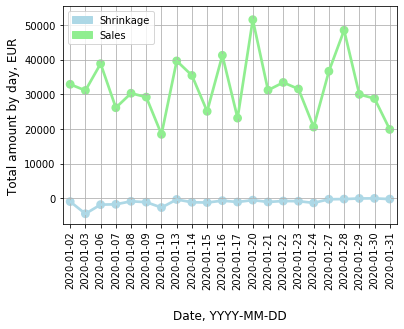

In [89]:
fig, ax = plt.subplots()

sns.pointplot( x=df_by_date.index,y='daily_shrinkage_in_euros',data=df_by_date,color='lightblue')
sns.pointplot( x=df_by_date.index, y='daily_sales_in_euros',data=df_by_date,color='lightgreen')
plt.xlabel('Date, YYYY-MM-DD',fontsize = 12, labelpad=20)
plt.ylabel('Total amount by day, EUR',fontsize = 12 )

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df_by_date.index.to_series().dt.strftime("%Y-%m-%d")))
shrinkage_patch = mpatches.Patch(color='lightblue', label='Shrinkage')
sales_patch = mpatches.Patch(color='lightgreen', label='Sales')
plt.legend(handles=[shrinkage_patch, sales_patch])
 
plt.grid()

*Figure 1. Trends of shrinkage, sales and stock in euros between 1st and 31st of January 2020.* 

Figure 1 shows that shrinkage is staying the same low during a month. There is some raise of srinkage on 2nd of January, it could be effected by holidays, probably we could assume that the store had bigger amount of products for New Year holidays. Also Figure 1 shows sales drop on specific dates (10th, 17 th, 24th of January), it is Friday so we are guessing that there is some dependency on weekday.

#### Explorind weekdays

On the previous step we assumed that sales dependends on a weekday. We will explore the assumption more by creating  a new dataframe where the main variables are groupped by a weekday. Department store is not getting any input on Saturday and Sunday.

In [41]:
arrange = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_by_weekday=df.groupby("weekday")["daily_shrinkage_in_euros","daily_sales_in_euros"].sum().reindex(arrange)
df_by_weekday.reset_index(inplace=True)
df_by_weekday = df_by_weekday.drop(index=[5, 6])
df_by_weekday["absolute_shrinkage"] = df_by_weekday["daily_shrinkage_in_euros"].apply(abs)
df_by_weekday

,weekday,daily_shrinkage_in_euros,daily_sales_in_euros,absolute_shrinkage
0,Monday,-2863.1071,166579.502,2863.1071
1,Tuesday,-4054.3495,141190.966,4054.3495
2,Wednesday,-2819.0344,118766.990,2819.0344
3,Thursday,-3477.4796,163614.560,3477.4796
4,Friday,-9617.0413,113097.963,9617.0413


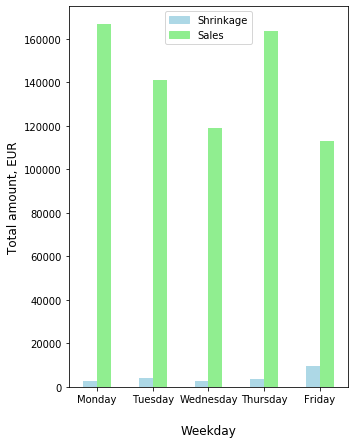

In [88]:
ax = df_by_weekday.plot.bar(x="weekday", y= ["absolute_shrinkage","daily_sales_in_euros"],color=["lightblue", "lightgreen"], rot=0, subplots=False, figsize=(5, 7))
plt.ylabel('Total amount, EUR',fontsize = 12,color='black')
plt.xlabel('Weekday',fontsize = 12, labelpad=20)
shrinkage_patch = mpatches.Patch(color = "lightblue", label='Shrinkage')
sales_patch = mpatches.Patch(color = "lightgreen", label='Sales')
plt.legend(handles=[shrinkage_patch, sales_patch])

*Figure 2. Total amount of shrinkage, sales and stock in euros by weekday* 

Figure 2 proves that daily sales on Friday is less then other weekdays. The peak of sales takes place on Mondays and on Thursdays. To make a clear vision of sales and shrinkage, we will find a proportion by weekday.

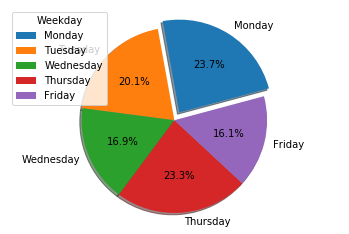

In [57]:
my_explode = (0.1, 0, 0, 0, 0)
plt.pie(df_by_weekday["daily_sales_in_euros"], labels=df_by_weekday['weekday'], autopct='%1.1f%%', startangle=15, shadow = True, explode=my_explode)
plt.axis('equal')
plt.legend(title="Weekday", loc='upper left', labels=df_by_weekday['weekday'], frameon=True, ncol=1)

*Figure 3. Proportion of sales by weekday* 

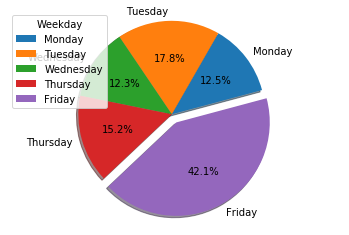

In [58]:
my_explode = (0, 0, 0, 0, 0.1)
plt.pie(df_by_weekday["absolute_shrinkage"], labels=df_by_weekday['weekday'], autopct='%1.1f%%', startangle=15, shadow = True, explode=my_explode)
plt.axis('equal')
plt.legend(title="Weekday", loc='upper left', labels=df_by_weekday['weekday'], frameon=True, ncol=1)

*Figure 4. Proportion of shrinkage by weekday* 

As a result, Figure 3 and Figure 4 shows that sales takes the biggest part on Mondays and on Thursdays, the least part on Fridays, on conterary shrinkage is reaching the highest value on Fridays (42,7%).

#### Exploring freshness

In [59]:
df['freshness'] = 'fresh'
df['freshness'][df['purchasing_area_description'] == 'ACM FLEISCH'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM FRISCHFISCH'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM GEMUESE'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM BLUMEN'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM OBST'] = 'ultrafresh'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

Now we have information about each product whether it belongs to fresh or ultrafrech category.

In [60]:
df_freshness = df.groupby("freshness")["daily_shrinkage_in_euros", "daily_sales_in_euros" ].sum().reset_index()
df_freshness

,freshness,daily_shrinkage_in_euros,daily_sales_in_euros
0,fresh,-16797.2265,394066.109
1,ultrafresh,-6034.9998,309183.872


Let's find proportions of fresh and ultrafresh products in absolute values of shrinkage and sales.

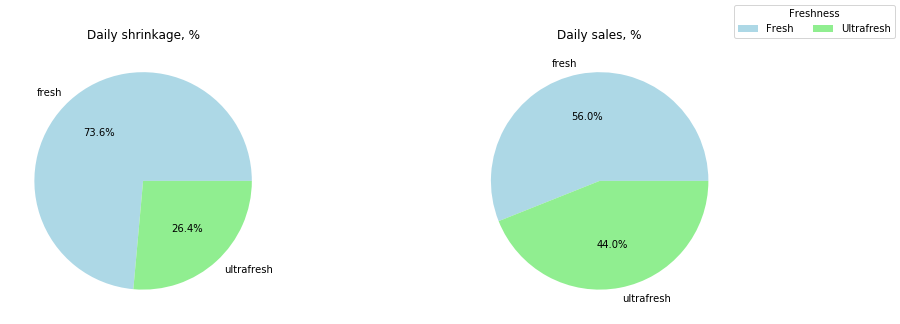

In [93]:
df_pie = pd.DataFrame({'fresh':[16797.2265,394066.109],
               'ultrafresh':[6034.9998, 309183.872],
               }, index=['daily_shrinkage_in_euros','daily_sales_in_euros' ])    
title= ['Daily shrinkage, %','Daily sales, %' ]
fig, axs = plt.subplots(nrows=1, ncols=df_pie.index.size, figsize=(15,5))
colors = ["lightblue","lightgreen"]
fig.subplots_adjust(hspace=1.5)


for row in range(df_pie.index.size):
    fig.add_subplot(axs[row] )
    plt.pie(df_pie.loc[df_pie.index[row],:], labels=df_pie.columns, autopct="%1.1f%%", colors=colors)
    axs[row].set_title(title[row])
fig.legend(title="Freshness", loc='upper right', labels=["Fresh", "Ultrafresh"], ncol=2)

*Figure 5. Proportion of Fresh and Ultrafresh products in shrinkage, stock and sales* 

Figure 5 demonstrates, that fresh products take the main part in shrinkage, stock and sales. So following the data for only one month we can conclude, that current depo has less utrafresh product then normal fresh.  We will also check how many unique products has each group. And find out a proportion of it.

In [64]:
df.groupby("freshness")["article_name"].nunique()

freshness
fresh         1026
ultrafresh     716
Name: article_name, dtype: int64

In [65]:
df.groupby("freshness")["article_name"].nunique()/df["article_name"].nunique() * 100

freshness
fresh         58.897819
ultrafresh    41.102181
Name: article_name, dtype: float64

58,9% of unique products belong to normal fresh and 41,1% belongs to ultrafresh (almost equal parts).

On this step, we found out that shrinkage for January 2020 containes bigger part of normal fresh products, then ultrafresh products.

#### Exploring the top best-selling products 

Let's explore the top 10 of the most sold products by finding percentage of sell each one out of total sum of sells. And compare it to the 10 products with the highest shrinkage.

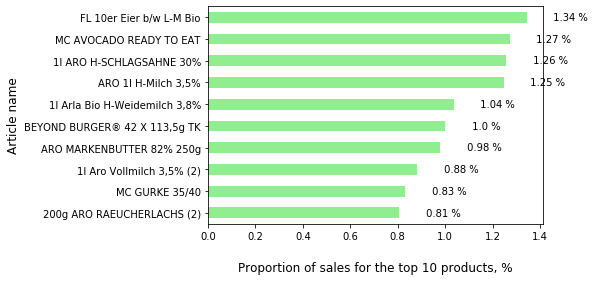

In [91]:
df_by_name_top_sale = df.groupby("article_name")["daily_sales_in_euros","daily_stock_in_euros","daily_shrinkage_in_euros"].sum().reset_index()
df_by_name_top_sale["% out of total sales"]= (df_by_name_top_sale["daily_sales_in_euros"]/df_by_name_top_sale["daily_sales_in_euros"].sum())* 100

df_by_name_top_sale = df_by_name_top_sale.nlargest(10, ["daily_sales_in_euros"])
df_by_name_top_sale.set_index("article_name", inplace=True, drop="true")

ax = df_by_name_top_sale["% out of total sales"][:10].plot.barh(color="lightgreen")
plt.xlabel("Proportion of sales for the top 10 products, %", fontsize = 12, labelpad=20);
plt.ylabel("Article name", fontsize = 12,);

for patch in ax.patches:
    ax.text(
        patch.get_width() + 0.1, 
        patch.get_y() + 0.38,
        " {} %".format(patch.get_width().round(2)), 
        fontsize=10,
        color='black'
    )

ax.invert_yaxis()

*Figure 6. Top 10 best-selling Products in the department store for January 2020*

Based on the sales of products across different categories in the department store, the top 10 best selling products are shown on Figure 6:

1. 10er Eier b/w L-M BIO
2. MC AVICADO 
3. 1L ARO H-SCHLAGSAHNE

....

Top 10 best-selling products in the department store for January 2020 make almost 11% of total sells. 

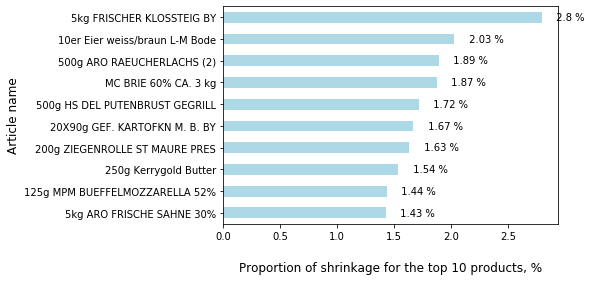

In [98]:
df_by_name_top_shrinkage = df.groupby("article_name")["daily_shrinkage_in_euros"].sum().reset_index()
df_by_name_top_shrinkage["% out of total shrinkage"]= (df_by_name_top_shrinkage["daily_shrinkage_in_euros"]/df_by_name_top_shrinkage["daily_shrinkage_in_euros"].sum())* 100
df_by_name_top_shrinkage = df_by_name_top_shrinkage.nsmallest(10, ["daily_shrinkage_in_euros"])
df_by_name_top_shrinkage.set_index("article_name", inplace=True, drop="true")

ax = df_by_name_top_shrinkage["% out of total shrinkage"][:10].plot.barh(color="lightblue")
plt.xlabel("Proportion of shrinkage for the top 10 products, %", fontsize = 12, labelpad=20);
plt.ylabel("Article name", fontsize = 12);
for patch in ax.patches:
    ax.text(
        patch.get_width() + 0.1, 
        patch.get_y() + 0.38,
        " {} %".format(patch.get_width().round(2)), 
        fontsize=10,
        color='black'
    )

ax.invert_yaxis()

*Figure 7. Top 10 products with the highest shrinkage in the department store for January 2020*

Based on the srinkage of products across different categories in the department store, the top 10 products with highest shrinkage are shown on Figure 7:

1. 5 kg Frischer Klossteig
2. 10er Eier weiss/braun L-M
3. 500g ARO RAEUCHERLACHS

...

These 10 products make up around 18% of total shrinkage. 
Let's explore only the first three products with the highest srinkage and find out what is the proportion of these products in sales.

In [138]:
df_new=df.groupby("article_name")["daily_sales_in_euros"].sum().reset_index()
top_3 = ["5kg FRISCHER KLOSSTEIG BY","10er Eier weiss/braun L-M Bode", "500g ARO RAEUCHERLACHS (2)"]
for product in top_3:
    print(df_new.loc[df_new["article_name"] == product])

                   article_name  daily_sales_in_euros
7257  5kg FRISCHER KLOSSTEIG BY                 192.0
                       article_name  daily_sales_in_euros
815  10er Eier weiss/braun L-M Bode                2026.0
                    article_name  daily_sales_in_euros
6248  500g ARO RAEUCHERLACHS (2)                1869.0


In [141]:
print(sum([192, 2026, 1869])/df_new["daily_sales_in_euros"].sum() *100)

0.5811589207849548


As a conclusion, top 3 products with the highest shrinkage take around 7% out of total shrinkage and make 0,58% of total sales. As a suggestion to "Metro", to check the reasons of such a high shrinkage of these products and these products could be removed from the store.

#### Exploring the main category of products

In [70]:
df["purchasing_area_description"].unique().tolist()

['ACM FLEISCH',
 'ACM BACKWAREN',
 'ACM FRISCHFISCH',
 'ACM MOLKEREIPRODUKTE',
 'ACM KAESE',
 'ACM FEINKOST',
 'ACM GOURVENIENCE',
 'ACM WURST',
 'ACM OBST',
 'ACM GEMUESE']

AMC BLUMEN has no any record.

In [143]:
df_areas = df.groupby("purchasing_area_description")["daily_sales_in_euros","daily_shrinkage_in_euros"].sum().drop(index="ACM BLUMEN").reset_index()
df_areas

,purchasing_area_description,daily_sales_in_euros,daily_shrinkage_in_euros
0,ACM BACKWAREN,14102.000,-199.9313
1,ACM FEINKOST,25170.000,-3371.1331
2,ACM FLEISCH,123057.865,-2184.6305
3,ACM FRISCHFISCH,28823.007,-1256.6433
4,ACM GEMUESE,102817.000,-2363.5960
5,ACM GOURVENIENCE,2502.810,0.0000
6,ACM KAESE,125558.000,-3716.3172
7,ACM MOLKEREIPRODUKTE,164432.299,-4353.7868
8,ACM OBST,54486.000,-230.1300
9,ACM WURST,62301.000,-5156.0581


Let's explore purchasing areas in depth.

Text(0.5, 1.0, 'Shrinkage in EUR by purchasing areas')

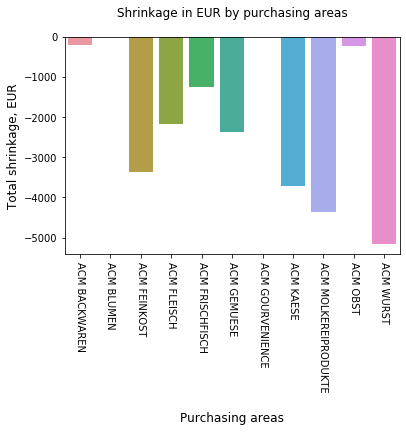

In [146]:
sns.barplot(data = df_areas, x = "purchasing_area_description", y = "daily_shrinkage_in_euros")
plt.xticks(rotation=-90)
plt.xlabel("Purchasing areas",  fontsize = 12, labelpad=20);
plt.ylabel("Total shrinkage, EUR", fontsize = 12);
plt.title('Shrinkage in EUR by purchasing areas', pad=20,color="black")

*Figure 8. Total shrinkage in euros by purchasing area*

Areas with the highest srinkage (following the Figure 8): ACM WURST, ACM MOLKEREIPRODUKTE and ACM KAESE, areas with the lowest shrinkage is ACM OBST and ACM BACKWAREN. 
ACM  GOURVENIENCE does not have shrinkage. It is the own brand of "Metro", so it could be that the shrinkage counts in a different way.

Text(0.5, 1.0, 'Sales in EUR by purchasing areas')

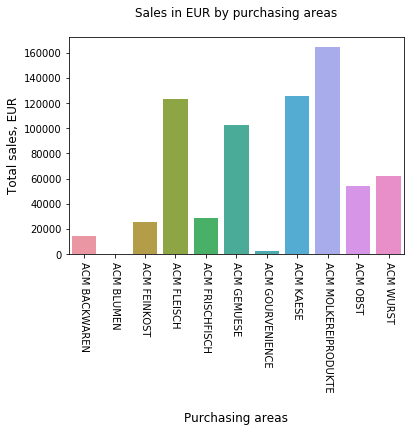

In [148]:
sns.barplot(data = df_areas, x = "purchasing_area_description", y = "daily_sales_in_euros")
plt.xticks(rotation=-90)
plt.xlabel("Purchasing areas",  fontsize = 12, labelpad=20);
plt.ylabel("Total sales, EUR",  fontsize = 12);
plt.title('Sales in EUR by purchasing areas', pad=20,color="black")

*Figure 9. Total sales in euros by purchasing area*

The areas with the highest sales(following Figure 9): ACM MOLKEREIPRODUKTE, ACM KAESE and ACM FLEISCH and with the lowest sales ACM BACKWAREN and ACM GOURVENIENCE which is similar to shrinkage.

Let's explore sales by category by ploting boxplot.

(0, 400)

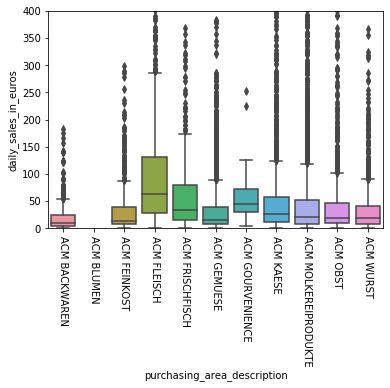

In [150]:
sns.boxplot(x = df["purchasing_area_description"], y = df["daily_sales_in_euros"])
plt.xticks(rotation=-90)
plt.ylim(0,400)

*Figure 10. Statistical visualisation of the sales by the main categories of products*

Using statistical visualisation of the sales by the main categories of products (Figure 10) we found that we got a lot of outliers. After the research of the topic, it was clarified that it is normal situation for real data sets to have many outliers. Here median is the best average mesure for our data set. We can infer from the Figure 10 that the highest average of total sale takes ACM FLEISCH category(63 EUR). We can conclude, that despite the fact that ACM MOLKEREIPRODUKTE has the highest total sales,  ACM Fleish category has the biggest normalised max values. 

#### Finding correlation

The last step is to make an conclusion about correlation between the target variables.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

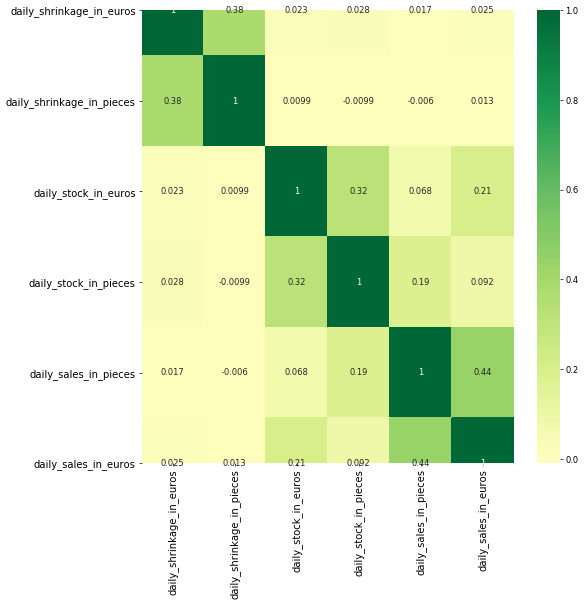

In [156]:
plt.figure(figsize=(10,10), dpi= 60)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

*Figure 11. The correllogram with correlation coefficients of all possible pairs of numeric variable*

Figure 11 doesn’t indicate that there’s any strong correlation, because correlation coefficient of all possible pairs of numeric variable less then 0.30. Correlation coefficient for sales in euros and shrinkage in euros is +0,025 which is very close to 0. We could prove the absense of any correlation by plot(Figure 12)

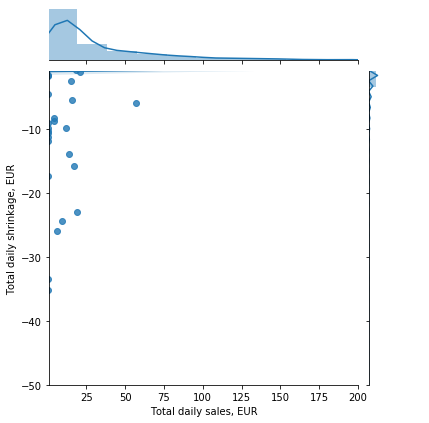

In [169]:
sns.jointplot(x="daily_sales_in_euros" , y="daily_shrinkage_in_euros",kind="reg", data=df.sample(1000));
plt.ylim([-50,-1]) 
plt.xlim([1,200])
plt.xlabel("Total daily sales, EUR");
plt.ylabel("Total daily shrinkage, EUR");

*Figure 12. Visualisation of relationship between sales and stock and the regression line that best fits the data points.*

The histogram on the top of Figure 12 shows the distribution of the total sales. The most frequent number of sales lays in between 1 to 200 euros. Distribution is positively skewed(mean = 49 is greater than the median = 21).

As the last step of the report, let's find what theoretical distribution is the most suitable to describe our sales data? First, let's test sales distributions with a python method and find which distribution fits.

In [173]:
data = df["daily_sales_in_euros"]
distributions = [st.alpha,st.beta,st.gamma,st.laplace,st.lognorm,st.pearson3,st.norm]
mles = []
for distribution in distributions:
    pars = distribution.fit(data)
    mle = distribution.nnlf(pars, data)
    mles.append(mle)
results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]
best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])[0]
print("Best fit for sales variable reached using {}".format(best_fit[0].name, best_fit[1]))

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Best fit for sales variable reached using lognorm


Logarithm of the sales variables is normally distributed. We have skewed distribution with low mean values, large variance, and all-positive values (Figure 13)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


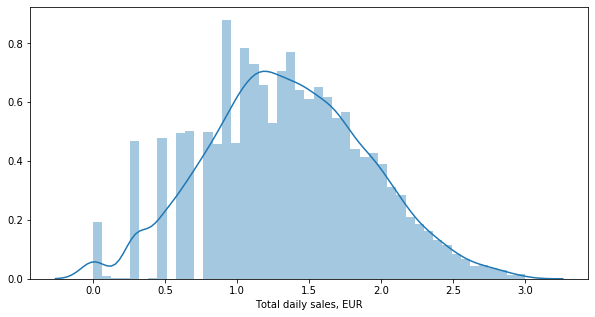

In [81]:
plt.figure(figsize=(10,5))
x = np.log10(df["daily_sales_in_euros"])
x = x[np.isfinite(x)]
ax = sns.distplot(x, kde=True)
plt.xlabel("Total daily sales, EUR");

Figure 13. Normal distribution of logarithm of the sales variables .

Now, we can plot distribution.

(0, 120)

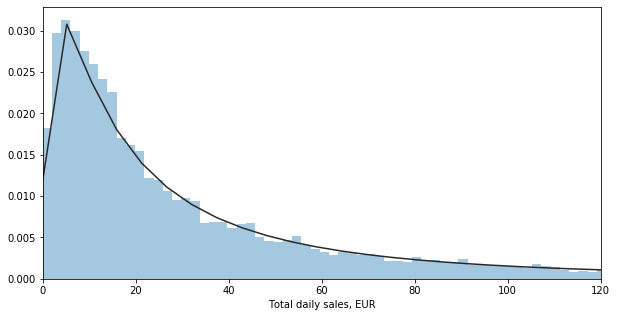

In [197]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df["daily_sales_in_euros"], fit=st.lognorm, kde=False, bins=500)
plt.xlabel("Total daily sales, EUR");
plt.xlim(0, 120)

*Figure 14. Visualizing sales lognorm distribution.*

In [195]:
x = df[df["daily_sales_in_euros"] > 0]
np.quantile(x["daily_sales_in_euros"], 0.75)

54.0

75% of the sales lay between 1 and 54 euros